In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [86]:
#HRTU_2 DATA !!!

cluster_data="HTRU_2.csv"
df = pd.read_csv(filepath_or_buffer=cluster_data,header=0)
df = df.rename(columns={"140.5625": "a", "55.68378214": "b",
                       "-0.234571412": "c", "-0.699648398": "d", 
                       "3.199832776": "e", "19.11042633": "f", 
                       "7.975531794": "g", "74.24222492": "h",
                       "0": "class"})
df = df.append({'a': 140.5625, 'b': 55.68378214, 'c': -0.234571412, 'd': -0.699648398,
               'e': 3.199832776, 'f': 19.11042633, 'g': 7.975531794, 'h': 74.24222492,
               'class': 0}, ignore_index=True)
x=df.values[:,0:-1]
y=df.values[:,-1].ravel()
df

,a,b,c,d,e,f,g,h,class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0.0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0.0
5,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0.0
6,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0.0
7,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0.0
8,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0.0
9,142.078125,45.288073,-0.320328,0.283953,5.376254,29.009897,6.076266,37.831393,0.0


In [11]:
#First attempt, using same data for learning as testing

logistic2 = LogisticRegression(intercept_scaling=2)
logistic2.fit(x, y)

# print out the linear model
print("coefficients: ", logistic2.coef_)
print("intercept: ", logistic2.intercept_)
#compute predicted values on test test;
predicted = logistic2.predict(x);
#print(predicted)
print("accuracy",logistic2.score(x,y))

coefficients:  [[ 1.74415462e-02 -3.62372724e-02  5.85571842e+00 -5.51304158e-01
  -2.85401409e-02  4.63597129e-02 -5.57049369e-02 -1.49577323e-03]]
intercept:  [-6.58809904]
accuracy 0.9793831713040563


In [57]:
# logistic regression using gradient descent. 
#
# input: 
#   in - training data encoded as an (n x m) matrix (1 instance per row).
#   alpha - the learning rate, a floating point number. 
#   iterations - the number of iteratins to run the algorithm. 
#
# output: the weights (coefficients) of the linear model.  
#
# For the input, assume that the target attribute is in the last column. 
def gradient_descent(indata, alpha, iterations):
    # get the number of rows and columns in the input data. 
    # get the number of rows and columns in the input data. 
    (rows, cols) = indata.shape; 
   
    # create a row vector of weights for each input column,
    # initialized to 0. 
    weights = np.zeros(cols);
    
    # 1) 
    # Prepend  a column of 1s to the instances (for the y-intercept)
    # 2) 
    # Separate the input attributes from the target attribute, forming
    # two matrices.
    instances = np.hstack((np.ones((rows,1)), indata[:,:-1]))
    targets = indata[:,-1] 
    
    # initialize a list to store the error at each iteration (for graphing). 
    errList = np.zeros(iterations);
    
    # run gradient descient for the given number of instances. 
    for i in range(iterations):
        # Compute model for each instance: Multiply instance input matrix
        # (n x m) by (m x 1) weight vector to get (n x 1) matrix of predictions.  
        model = compute_model(instances,weights);
        
        # 5) For each instance D, compute the difference D_i between the target and the predicted value. 
        diff = (model - targets);
        # 6) Update the weights w_1, w_2, ..., w_m. For each column position j: 
        for j in range(cols):
          # 6.1) multiply each instance i's attribute value x_j by D_i
          # 6.2) Sum the results of 6.1 together. 
            dJ = np.sum(diff * instances[:,j])
          # 6.3) multiply 6.2's value by alpha and subract the result
          # from w_j. This yields the new value for w_j
            weights[j] = weights[j] - alpha*dJ
        # add the count for correctly classified instances for this iteration
        errList[i] = num_correct(model, targets)
    return (weights, model, targets, errList)

def compute_model(inst, w):
    return 1/(1+np.exp(-1*inst.dot(w)))

# count correct predictions
def num_correct(model, targets):
    return np.sum(classes(model) == classes(targets))
 
# convert h(x) to a class (True or False)
def classes(model):
    return model >= 0.5

weights: [-2.89449525e+01  1.65022200e-01  1.29734972e-01  6.26166682e+01
 -5.40917731e-01 -4.79194632e-01 -4.24759720e-02 -4.24097715e+00
  9.08684386e-02]
count: 17898 correct: 17491 accuracy: 0.9772600290535255


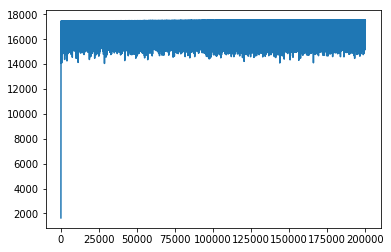

In [59]:
#Hand-rolled code example from class - lower accuracy but not by much
#Running code takes a much longer time

data = df.values
(w,predicted, target, e) = gradient_descent(data, 0.00001, 200000)
print("weights:", w)
correct = np.sum(classes(predicted) == classes(target))
count = len(target)
print("count:", count, "correct:", correct, "accuracy:",correct/count)
plt.plot(e)
plt.show()

In [9]:
print("Removing any of the columns does NOT increase accuracy")

Removing any of the columns does NOT increase accuracy


In [55]:
#Scaling data to Logistic Regression. Doesn't improve accuracy

x_scaled = scale(x)

logistic3 = LogisticRegression(intercept_scaling=2)
logistic3.fit(x_scaled, y)

# print out the linear model
print("coefficients: ", logistic3.coef_)
print("intercept: ", logistic3.intercept_)
#compute predicted values on test test;
predicted3 = logistic3.predict(x_scaled);
#print(predicted)
print("accuracy",logistic3.score(x_scaled,y))

coefficients:  [[ 0.49767746 -0.16600681  6.11719936 -3.09198337 -0.81911875  1.00244579
   0.07118955 -0.38339555]]
intercept:  [-4.19785536]
accuracy 0.9789920661526428


In [30]:
#Logistic regression with 80% of data set used for training and 20% used for testing

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

logistic4 = LogisticRegression(C=100.0)
logistic4.fit(X_train, y_train)

# print out the linear model
print("coefficients: ", logistic4.coef_)
print("intercept: ", logistic4.intercept_)
#compute predicted values on test test;
predicted4 = logistic4.predict(X_test);
#print(predicted)
print("accuracy",logistic4.score(X_test, y_test))

coefficients:  [[ 2.53108844e-02 -3.41166021e-02  6.22899684e+00 -5.82307918e-01
  -3.05535320e-02  5.24445612e-02 -1.09857896e-02 -2.61182933e-03]]
intercept:  [-8.07326827]
accuracy 0.9812849162011174


In [73]:
#print(logistic4.predict_proba(X_test)[:,0:1].size)
#print(y_test.size)

#plt.scatter(X_test[:,0:1],logistic4.predict_proba(X_test)[:,0:1])

print(classification_report(y_test, logistic4.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      3264
        1.0       0.94      0.84      0.89       316

avg / total       0.98      0.98      0.98      3580



In [53]:
#Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and 
#choose either the best or worst performing feature, setting the feature aside and then repeating the 
#process with the rest of the features. This process is applied until all features in the dataset are exhausted. 
#The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

#Based on the result of all 1s, each feature is performing the same, which means that none should be given priority

from sklearn.feature_selection import RFE
logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(x, y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


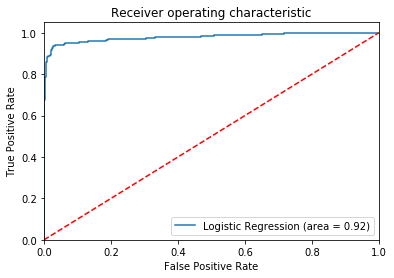

In [46]:
#The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. 
#The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far 
#away from that line as possible (toward the top-left corner).

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic4.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic4.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [54]:
#Confustion Matrix
#We have 3248 + 264 correct and 16 + 52 incorrect

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted4)
print(confusion_matrix)

[[3248   16]
 [  52  264]]


In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler

"""
Read in data
"""
print("Reading data...")
# df = pd.read_csv('HTRU_2.csv')
df0 = pd.read_csv('data0.csv')
df1 = pd.read_csv('data1.csv')

df0 = df0.sample(n=len(df1), random_state = 0)

"""
Preprocess and data preparation
"""
print("Processing data...")

pre_features_0 = df0.iloc[: , :8]
pre_target_0 = df0['class']

# rescale variables to have 0 mean and unit variance
df_columns_0 = pre_features_0.columns
scaler = StandardScaler()
scaledf_0 = scaler.fit_transform(pre_features_0)

pre_features_1 = df1.iloc[: , :8]
pre_target_1 = df1['class']

# rescale variables to have 0 mean and unit variance
df_columns_1 = pre_features_1.columns
scaledf_1 = scaler.fit_transform(pre_features_1)

# restructure dataframe
df0 = pd.DataFrame(scaledf_0)
df0.columns = df_columns_0
df0['class'] = pre_target_0
df0['class'] = df0['class'].fillna(0).astype(np.int64)

df1 = pd.DataFrame(scaledf_1)
df1.columns = df_columns_1
df1['class'] = pre_target_1

# reassign feature and targets to newly scaled variables
features_0 = df0.iloc[:, :8]
target_0 = df0['class']

features_1 = df1.iloc[:, :8]
target_1 = df1['class']

# pre_features = df.iloc[: , :8]
# pre_target = df['class']

# # rescale variables to have 0 mean and unit variance
# df_columns = pre_features.columns
# scaler = StandardScaler()
# scaledf = scaler.fit_transform(pre_features)

# # restructure dataframe
# df = pd.DataFrame(scaledf)
# df.columns = df_columns
# df['class'] = pre_target

# # reassign feature and targets to newly scaled variables
# features = df.iloc[:, :8]
# target = df['class']

# split dataset into test and train split
# 80/20 split
feat_train_0, feat_test_0, target_train_0, target_test_0 = train_test_split(features_0, target_0, train_size = 0.8, random_state = 0)
feat_train_1, feat_test_1, target_train_1, target_test_1 = train_test_split(features_1, target_1, train_size = 0.8, random_state = 0)

feat_train = feat_train_0.append(feat_train_1)
feat_test = feat_test_0.append(feat_test_1)
target_train = target_train_0.append(target_train_1)
target_test = target_test_0.append(target_test_1)

# print(feat_train)
# print(feat_test)
# print(target_train)
# print(target_test)

"""
Set up different SVM models to see which performs best.

C is set to 1 to start and if different hyperplanes are needed, C is raised or 
lowered accordingly.

For Gaussian model, we set gamma to 1 to begin. If we need less or more curvature
in our decision boundary, we will adjust gamma.

We use 'ovr' as our decision function shape. This stands for one vs rest or 
one vs all. Since we only have two classes 0 or 1, this will work fine for our
purposes.
"""
# Linear
print("Preparing Linear model...")
linearSVM = svm.SVC(kernel='linear', C=1, decision_function_shape = 'ovo')
linearSVM.fit(feat_train, target_train)

# Gaussian RBF
print("Preparing Gaussian RBF model...")
rbfSVM = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape = 'ovr')
rbfSVM.fit(feat_train, target_train)

# Polynomial
print("Preparing Polynomial model...")
polySVM = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape = 'ovo')
polySVM.fit(feat_train, target_train)

# Sigmoid
print("Preparing Sigmoid model...")
sigSVM = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')
sigSVM.fit(feat_train, target_train)

# Predict using the SVM models
print("Conducting predictions...")
linear_pred = linearSVM.predict(feat_test)
rbf_pred = rbfSVM.predict(feat_test)
poly_pred = polySVM.predict(feat_test)
sig_pred = sigSVM.predict(feat_test)

# Calculate the accuracies of each model
print("Calculating accuracies...")
linear_acc = accuracy_score(linear_pred, target_test)
rbf_acc = accuracy_score(rbf_pred, target_test)
poly_acc = accuracy_score(poly_pred, target_test)
sig_acc = accuracy_score(sig_pred, target_test)

# Print results
print("\n\nRESULTS:")
print("Linear model accuracy:", linear_acc)
print("Gaussian RBF model accuracy:", rbf_acc)
print("Polynomical model accuracy:", poly_acc)
print("Sigmoid model accuracy:", sig_acc)



Reading data...
Processing data...
Preparing Linear model...


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Preparing Gaussian RBF model...
Preparing Polynomial model...
Preparing Sigmoid model...
Conducting predictions...
Calculating accuracies...


RESULTS:
Linear model accuracy: 0.5487804878048781
Gaussian RBF model accuracy: 0.9984756097560976
Polynomical model accuracy: 0.725609756097561
Sigmoid model accuracy: 0.42378048780487804


In [94]:
#Logistic regression with 20% of data set used for training and 80% used for testing


logistic5 = LogisticRegression()
logistic5.fit(feat_train, target_train)

# print out the linear model
print("coefficients: ", logistic5.coef_)
print("intercept: ", logistic5.intercept_)
#compute predicted values on test test;
predicted5 = logistic5.predict(feat_test);
#print(predicted)
print("accuracy",logistic5.score(feat_test, target_test))

coefficients:  [[ 0.01792469  0.07980263  0.0570014   0.0465818  -0.042674    0.01542118
  -0.06962592  0.06473762]]
intercept:  [3.34600541e-05]
accuracy 0.4801829268292683
